In [8]:
import pandas
import seaborn as sns
from itertools import product
from typing import List

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")


def allocs(*args: List[List[str]]) -> List[str]:
    return ["".join(r) for r in product(*args)]


def read_orders(bench: str) -> pandas.DataFrame:
    data = []
    for o in range(11):
        d = pandas.read_csv(f"{dir}/{bench}{o}.csv")
        d["order"] = str(o)
        data.append(d)
    data = pandas.concat(data)
    data["cores"] = data["x"]
    data["get"] = data["get_avg"]
    data["put"] = data["put_avg"]
    return data


dir = "out-221214_1540"


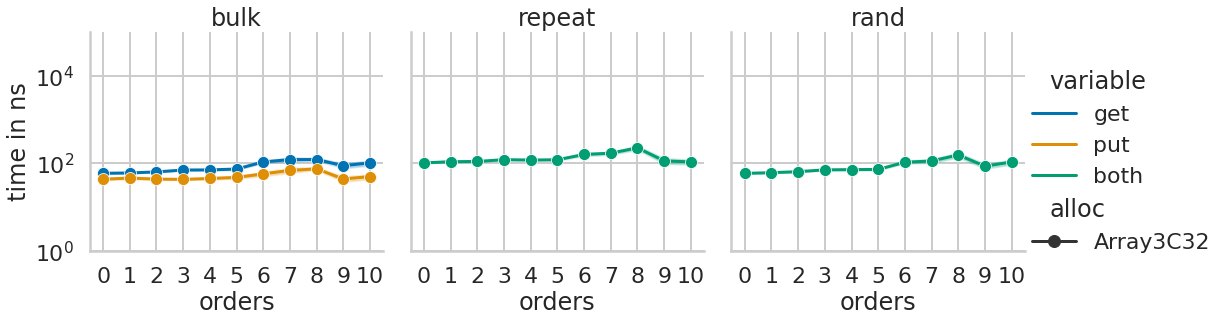

In [18]:
data_b = read_orders("bulk_v")
data_b["bench"] = "bulk"
data_r = read_orders("repeat_v")
data_r["bench"] = "repeat"
data_r["both"] = data_r["get"]
data_r["get"] = 0
data_r["put"] = 0
data_a = read_orders("rand_v")
data_a["bench"] = "rand"
data_a["both"] = data_a["get"]
data_a["get"] = 0
data_a["put"] = 0
data = pandas.concat([data_b, data_r, data_a])


with sns.plotting_context("poster"):
    # pgd = data[data["alloc"] == "Array3C32"]
    pgd = data[["bench", "order", "cores", "alloc", "get", "put", "both"]].melt(
        id_vars=["bench", "order", "cores", "alloc"],
        value_vars=["get", "put", "both"], value_name="time")
    g = sns.relplot(data=pgd, kind="line", x="order", y="time", col="bench",
                    markers=True, hue="variable", style="alloc")
    g.set(ylim=(1, 10**5))
    g.set(yscale="log")
    g.set(ylabel="time in ns")
    g.set(xlabel="orders")
    g.set_titles("{col_name}")


# Bulk

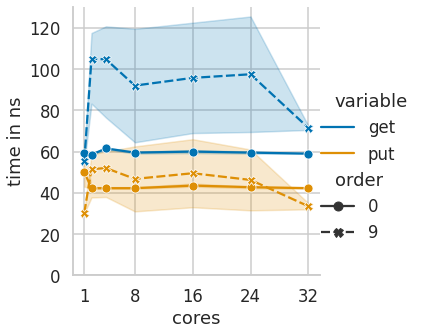

In [10]:
data = read_orders("bulk_v")
pgd = data[data["alloc"] == "Array3C32"]
pgd = pgd[["order", "cores", "alloc", "get", "put"]].melt(
    id_vars=["order", "cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
order = ["0", "9"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                markers=True,
                style="order", hue="variable", style_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


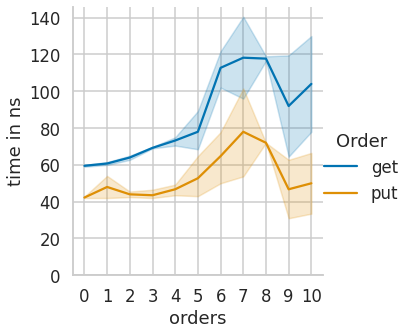

In [11]:
data = read_orders("bulk_v")
pgd = data[data["cores"] == 8]
pgd = pgd[["order", "alloc", "get", "put"]].melt(
    id_vars=["order", "alloc"],
    value_vars=["get", "put"], value_name="time")

g = sns.relplot(data=pgd, kind="line", x="order", y="time",
                markers=True, hue="variable")
g.set(ylim=(0, None))
g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="orders")
g.set_titles("{col_name}")


# Repeat

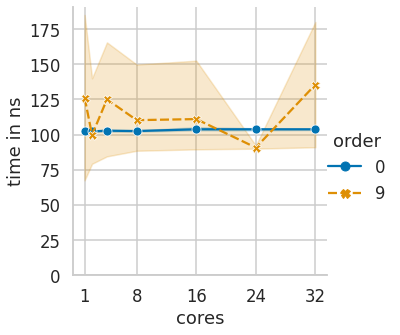

In [12]:
data = read_orders("repeat_v")
order = ["0", "9"]
g = sns.relplot(data=data, kind="line", x="cores", y="get",
                style="order", hue="order", style_order=order, hue_order=order,
                markers=True)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


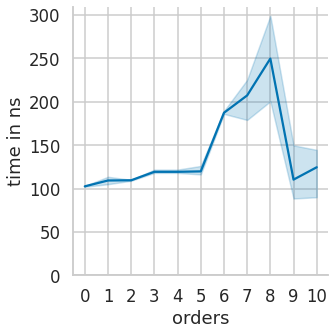

In [13]:
data = read_orders("repeat_v")
pgd = data[data["cores"] == 8]
g = sns.relplot(data=pgd, kind="line", x="order", y="get",
                markers=True)
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="orders")
g.set_titles("{col_name}")


# Random

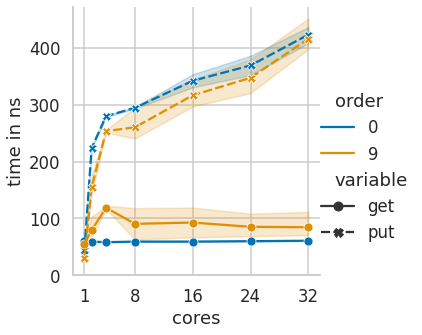

In [14]:
data = read_orders("rand_v")
pgd = data[data["alloc"] == "Array3C32"]
pgd = pgd[["order", "cores", "alloc", "get", "put"]].melt(
    id_vars=["order", "cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
order = ["0", "9"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                style="variable", hue="order", hue_order=order,
                markers=True)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


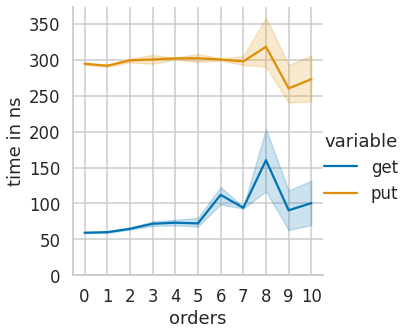

In [15]:
data = read_orders("rand_v")
pgd = data[data["cores"] == 8]
pgd = pgd[["order", "alloc", "get", "put"]].melt(
    id_vars=["order", "alloc"],
    value_vars=["get", "put"], value_name="time")

g = sns.relplot(data=pgd, kind="line", x="order", y="time",
                markers=True,
                hue="variable")
# g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="orders")
g.set_titles("{col_name}")
